In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
figs = os.path.join('../../plots')
file = os.path.join('../../results/raw-results.csv')

df = pd.read_csv(file)

sns.set(font_scale=1.6)
sns.set_style("ticks")

sns.set_context("paper", font_scale=2.6)   

In [3]:
df_invo = df[df['Experiment'] == 'LOOP']

In [4]:
bench = df_invo[df_invo['Class'] == 'LongCompressionBenchmark']
bench = bench[bench['Method'] == 'readContinuous']

In [5]:
f = sns.color_palette("Blues", 10)[0]
s = sns.color_palette("Blues", 10)[-3]

In [6]:
sns.color_palette("Blues", 10)

[(0.8978854286812764, 0.939038831218762, 0.977362552864283),
 (0.828881199538639, 0.8937639369473279, 0.954725105728566),
 (0.7506343713956171, 0.8478431372549019, 0.9282122260668974),
 (0.6325259515570935, 0.7976470588235294, 0.8868742791234141),
 (0.491764705882353, 0.7219684736639754, 0.8547789311803152),
 (0.36159938485198, 0.6427374086889658, 0.8165782391387928),
 (0.24816608996539793, 0.5618915801614763, 0.7709803921568628),
 (0.15072664359861593, 0.4644521337946943, 0.7207843137254902),
 (0.07481737793156479, 0.3732564398308343, 0.6552095347943099),
 (0.03137254901960784, 0.28161476355247983, 0.5582622068435218)]

In [7]:
config_of_interest = [
    ' (dirPath = longCompress/, file = zipfHigh, format = auto, strategy = none)',
    ' (dirPath = longCompress/, file = zipfLow, format = longs, strategy = none)',
    ' (dirPath = longCompress/, file = uniform, format = longs, strategy = none)',
    ' (dirPath = longCompress/, file = sequential, format = longs, strategy = none)',
    ' (dirPath = longCompress/, file = zipfHigh, format = longs, strategy = none)',
    ' (dirPath = longCompress/, file = enumerate, format = longs, strategy = none)',
    ' (dirPath = longCompress/, file = enumerate, format = auto, strategy = none)',
    ' (dirPath = longCompress/, file = sequential, format = auto, strategy = none)',
    ' (dirPath = longCompress/, file = zipfLow, format = auto, strategy = none)',
    ' (dirPath = longCompress/, file = uniform, format = auto, strategy = none)'
]

<Figure size 432x288 with 0 Axes>

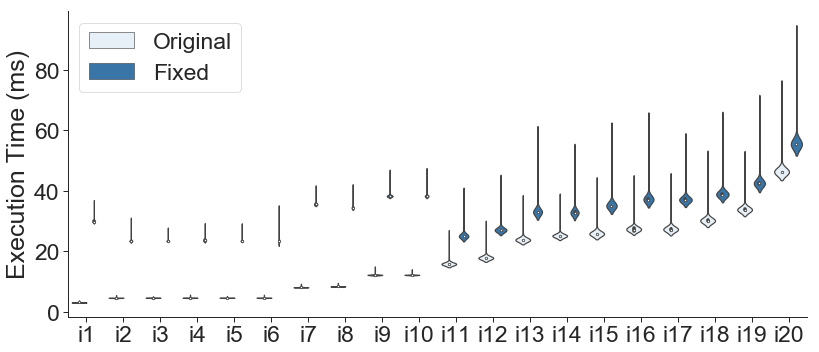

In [8]:
%matplotlib inline
plt.clf()

#sns.set(font_scale=2.0)
#sns.set_style("ticks")

import math

bench = df_invo[df_invo['Class'] == 'LongCompressionBenchmark']
bench = bench[bench['Method'] == 'readContinuous']
bench = bench.sort_values(by='Score')
bench = bench.replace('fixed_full', 'Fixed')
bench = bench.replace('original', 'Original')
bench['Score log'] = bench['Score'].apply(lambda x: np.log10(x))
#bench = bench[~bench['Full params'].isin(config_of_interest)]



#headers_table = pd.pivot_table(data=headers_bench, values='Score', index=['Version','Method', 'Iteration', 'Fork', 'Trial'])
cat = sns.catplot(data=bench, x='Full params', y='Score', hue='Version', 
                  ci=95, kind='violin', sharey=False, legend_out=False, legend=True, aspect=2.4, palette=[f, s])
cat.set_axis_labels("", "Execution Time (ms)")
cat.set_xticklabels(['i' + str(i) for i in list(range(1,21))])
cat.set_titles("{col_name}")

#plt.legend(bbox_to_anchor=(0, .95), loc=2, borderaxespad=0.)
plt.legend(loc='upper left')
#plt.ylim([0, 60])
#plt.xticks(fontsize=20)
#plt.show()
plt.tight_layout()
plt.savefig(os.path.join(figs, 'LOOP-druid-longcompressionbenchmark-continuous.pdf'))

